10 0.841 0.02586503431275512
50 0.8799999999999999 0.026076809620810618
100 0.9049999999999999 0.01284523257866514
500 0.924 0.021999999999999978
1000 0.9200000000000002 0.01999999999999998
5000 0.921 0.015779733838059473


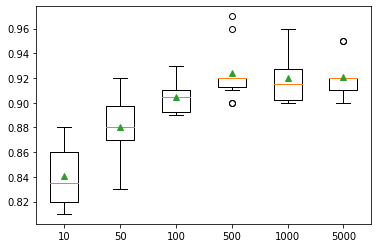

In [23]:
## using a custom function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

def get_dataset():
    x,y=make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return x,y
def get_models():
    models=dict()
    n_trees=[10,50,100,500,1000,5000]
    for n in n_trees:
        models[str(n)]=GradientBoostingClassifier(n_estimators=n)
    return models

def eval_model(model,x,y):
    cv=KFold(n_splits=10,random_state=1,shuffle=True)
    scores=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
    return scores

x,y=get_dataset()
models=get_models()
results,names=list(),list()
for name,model in models.items():
    scores=eval_model(model,x,y)
    results.append(scores)
    names.append(name)
    print(name,mean(scores),std(scores))
    
plt.boxplot(results,labels=names,showmeans=True)
plt.show()
    


working with learning rate (hyperparameter tuning),turns out 0.1 learning rate is the most suitable

0.0001 0.669 0.1482868841131946
0.001 0.7869999999999999 0.032878564445547195
0.01 0.842 0.029933259094191523
0.1 0.9039999999999999 0.013564659966250548
1.0 0.905 0.01284523257866514


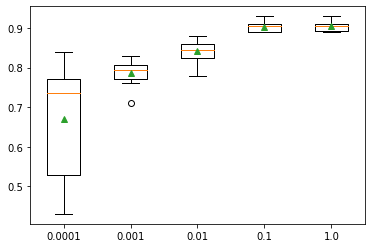

In [24]:
## using a custom function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

def get_dataset():
    x,y=make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return x,y
def get_models():
    models=dict()
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        models[i]=GradientBoostingClassifier(learning_rate=i)
    return models

def eval_model(model,x,y):
    cv=KFold(n_splits=10,random_state=1,shuffle=True)
    scores=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
    return scores

x,y=get_dataset()
models=get_models()
results,names=list(),list()
for name,model in models.items():
    scores=eval_model(model,x,y)
    results.append(scores)
    names.append(name)
    print(name,mean(scores),std(scores))
    
plt.boxplot(results,labels=names,showmeans=True)
plt.show()
    
